## Titanic 승객 데이터로 의사결정나무 만들기

### 1. 데이터셋 로딩

In [25]:
# 패키지 불러오기 
import pandas as pd
import numpy as np 
from sklearn import model_selection
from sklearn import metrics 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
# 데이터프레임으로 데이터 읽어오기
dt = pd.read_csv('/Users/hayeon/Downloads/2021-2(3-2)/머신러닝/data/titanic.csv', index_col=['PassengerId'])
print(dt.shape)
dt.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. 데이터 전처리

In [27]:
# 필요없는 컬럼 제거 
df = dt.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,NaN,1,2,23.4500


In [28]:
# 전처리: 진위형 변수로 변경 
df['Sex'] = df.Sex.map({'female':0, 'male':1})

In [29]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,NaN,1,2,23.4500


In [30]:
# 결측치 확인 
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [31]:
# 중간값으로 결측치 채워주기 
df.Age.fillna(df.Age.median(), inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,28.0,1,2,23.4500


In [32]:
# input 변수와 Output 변수 구분 
X = np.array(df.iloc[:, 1:])
y = np.array(df['Survived'])

In [33]:
X

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  0.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [34]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

## 3. 모델 적합 

In [35]:
# 트레이닝 세트와 테스트 세트로 데이터 구분 (여기서는 7:3으로 구분)
from sklearn.model_selection import train_test_split

# random_state는 반복적으로 같은 결과를 내기 위해서 설정 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train 크기: ", X_train.shape)
print("X_test 크기: ", X_test.shape)
print("y_train 크기: ", y_train.shape)
print("y_test 크기: ", y_test.shape)

X_train 크기:  (623, 6)
X_test 크기:  (268, 6)
y_train 크기:  (623,)
y_test 크기:  (268,)


In [36]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## 4. 모델 성능평가

In [37]:
temp_y_pred = tree.predict(X_test)

# Training 값을 X_test에서 넣음 
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0]
실제값
 [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1

In [38]:
# 정확도 계산 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(y_test, temp_y_pred)

# y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출함 
print('정확도: ', format(temp_acc))

정확도:  0.8208955223880597


In [39]:
# 오차행렬 (Confusion Matrix)
print(confusion_matrix(y_test, temp_y_pred))

[[146  22]
 [ 26  74]]


In [40]:
# 모델 성능 
print(classification_report((tree.predict(X_test)>0.5).astype('int16'), y_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       172
           1       0.74      0.77      0.76        96

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [41]:
print(classification_report((tree.predict(X_test)).astype('int16'), y_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       172
           1       0.74      0.77      0.76        96

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



# 과적합과 가지치기
* 의사결정 나무의 깊이별 정확도 비교와 최적의 의사결정나무 깊이 구하기

In [42]:
train_scores, test_scores = list(), list()

# Train_score와 test_score의 정확도를 저장할 장소. 
# train_score는 훈련데이터에 특화될수록 증가 
# test_score는 테스트데이터에 일반화될수록 증가

In [43]:
# 의사결정 나무 모델의 depth 조절 (1부터 19까지)
for i in range(1, 20):
    DT1 = DecisionTreeClassifier(max_depth=i)
    # 깊이를 증가시키면서 의사결정나무 모델 적합 
    DT1.fit(X_train, y_train)
    
    # training dataset 정확도 평가 
    train_att = DT1.predict(X_train)
    train_acc = accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    # test dataseet 정확도 평가 
    test_att = DT1.predict(X_test)
    test_acc = accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    # Train 정확도와 Test 정확도를 depth 개수에 따른 정확도 확인 
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.787, test: 0.787
>2, train: 0.791, test: 0.787
>3, train: 0.836, test: 0.821
>4, train: 0.844, test: 0.821
>5, train: 0.859, test: 0.813
>6, train: 0.872, test: 0.795
>7, train: 0.881, test: 0.802
>8, train: 0.905, test: 0.810
>9, train: 0.926, test: 0.813
>10, train: 0.941, test: 0.810
>11, train: 0.960, test: 0.772
>12, train: 0.966, test: 0.810
>13, train: 0.973, test: 0.806
>14, train: 0.976, test: 0.810
>15, train: 0.978, test: 0.799
>16, train: 0.978, test: 0.795
>17, train: 0.979, test: 0.799
>18, train: 0.979, test: 0.813
>19, train: 0.979, test: 0.772


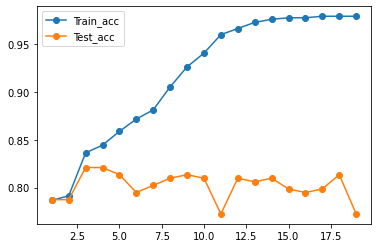

In [44]:
from matplotlib import pyplot 

pyplot.plot(range(1, 20), train_scores, '-o', label='Train_acc')
pyplot.plot(range(1, 20), test_scores, '-o', label='Test_acc')
pyplot.legend()
pyplot.show()

## 최적의 의사결정나무 깊이 = 3

## 트리 시각화 

In [45]:
# 트리 시각화를 위한 라이브러리 설치 
!pip install pydotplus 
!pip install graphviz

You should consider upgrading via the '/Users/hayeon/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/hayeon/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [46]:
# 트리 시각화 
import graphviz
from sklearn.tree import export_graphviz

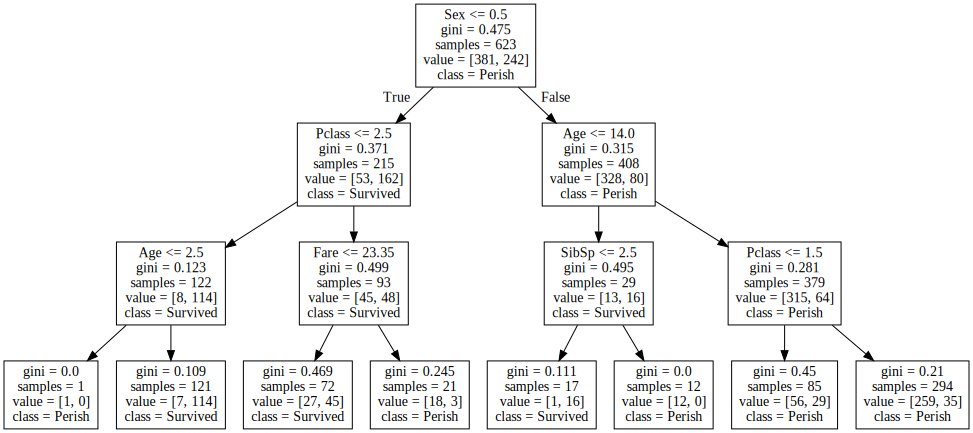

In [47]:
feature_name = ['Pclass', 'Sex','Age','SibSp','Parch','Fare']
tree = export_graphviz(tree, feature_names=feature_name, 
                      class_names = ['Perish','Survived'])
graphviz.Source(tree)

![tree](https://user-images.githubusercontent.com/81375328/143537049-cac290dc-98bd-4362-8c23-efe37932aa08.png)